# Data Cookbook

**The four most useful data science techniques**
1. Cluster Analysis
2. API and web scrapping
3. Dimensionality reduction
4. Data manipulation and useful functions

In [173]:
# Libraries
import pandas as pd
import numpy as np

# for the Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# kmeans clustering
from scipy.cluster.vq import vq, kmeans

# hierarchical clustering
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

# API and web scrapping
import requests
from bs4 import BeautifulSoup
import json

# PCA
from sklearn.preprocessing import StandardScaler

In [174]:
# Uploading the datasets
df_parks = pd.read_csv('parks_data_2024.csv')

# Cluster Analysis
Which one to use?

- hierarical: 

    - Exploring data relationships: Hierarchical clustering is ideal for uncovering hierarchical structures within your data, showing how clusters relate to each other at different levels of granularity.

    - Smaller datasets: It can be computationally expensive, making it less suitable for very large datasets.

    - Unknown number of clusters: It allows you to explore different levels of clustering without needing to predefine the number of clusters.

    - Exploring relationships between data points: It's useful when the relationships between data points are as important as the groupings themselves

- kmeans: 

    - Large datasets: K-means is efficient and scalable, making it suitable for large datasets where speed is a priority.

    - Known number of clusters: You need to know (or estimate) how many clusters you want to create.
    - Well-defined cluster structures: K-means performs best when clusters have a clear, spherical shape.
    - When speed and efficiency are important: K-means is faster and more computationally efficient than hierarchical clustering

**K-means clustering**

In [175]:
# Choose two columns to cluster
df_parks_col = df_parks[['Hoops','Pickleball_combined']].copy()
df_parks_col['Hoops'] = df_parks_col['Hoops'] * 2

# Normalize both of them
df_parks_col['Hoops_scaled'] = df_parks_col['Hoops'] / df_parks_col['Hoops'].std()
df_parks_col['Pickleball_combined_scaled'] = df_parks_col['Pickleball_combined'] / df_parks_col['Pickleball_combined'].std()
df_parks_col


,Hoops,Pickleball_combined,Hoops_scaled,Pickleball_combined_scaled
0,10.120269,2.891505,1.333337,2.638993
1,3.009799,1.447019,0.396539,1.320652
2,3.951966,0.693327,0.520668,0.632780
3,15.661273,1.410018,2.063360,1.286883
4,34.188730,1.628035,4.504337,1.485860
...,...,...,...,...
95,5.856951,0.864140,0.771649,0.788676
96,14.207006,2.468901,1.871762,2.253294
97,13.936624,1.030223,1.836139,0.940254
98,6.439824,1.623045,0.848442,1.481306


*First step is to figure out out the num of clusters*

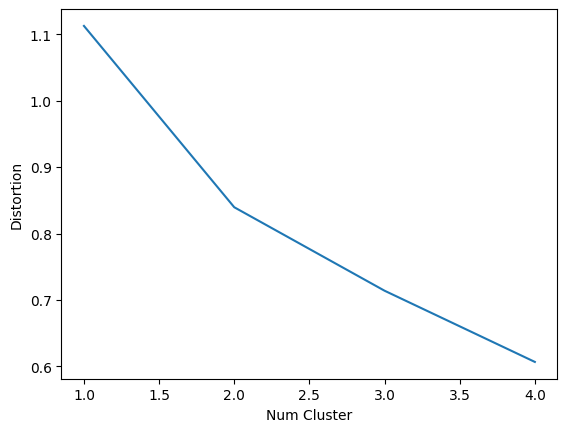

In [176]:
# Using the elbow plot method to find the number of clusters
distortions = []

# Loop through 5 clusters options
for i in range(1,5):
    cluster_center, distortion = kmeans(df_parks_col[['Hoops_scaled','Pickleball_combined_scaled']], i)
    distortions.append(distortion)

# Add the list of distortion and the range of number of clusters into a dataframe to plot 
elbow_plot_df = pd.DataFrame({'Num Cluster': range(1,5), 'Distortion': distortions})

# Plot the elbow to figure the number of clusters
sns.lineplot(x = 'Num Cluster', y = 'Distortion', data = elbow_plot_df)
plt.show()

*The most optimal number of clusters is 2*

**Create the clusters with two clusters**

In [177]:
cluster_centers, distortion = kmeans(df_parks_col[['Hoops_scaled','Pickleball_combined_scaled']], 2)

# Label the clusters on the dataframe
df_parks_col['label'], distortion = vq(df_parks_col[['Hoops_scaled','Pickleball_combined_scaled']], cluster_centers)

**Finally graph the two features with the cluster labeling**

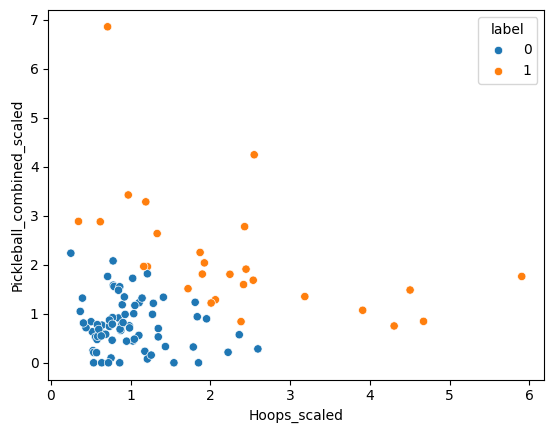

In [178]:
sns.scatterplot(x = 'Hoops_scaled', y = 'Pickleball_combined_scaled', data = df_parks_col, hue = 'label')

plt.show()

**Hierarchical Clustering**

In [179]:
# Prepare the normalize the data

df_parks_col2 = df_parks[['investment_dollars', 'Rec_senior_centers']].copy()
df_parks_col2['investment_dollars_per_20k'] = df_parks_col2['investment_dollars'] * 20000

df_parks_col2['investment_dollars_per_20k_scaled'] = df_parks_col2['investment_dollars_per_20k'] / df_parks_col2['investment_dollars_per_20k'].std()
df_parks_col2['Rec_senior_centers_scaled'] = df_parks_col2['Rec_senior_centers'] / df_parks_col2['Rec_senior_centers'].std()

df_parks_col2

,investment_dollars,Rec_senior_centers,investment_dollars_per_20k,investment_dollars_per_20k_scaled,Rec_senior_centers_scaled
0,220.434307,1.120458,4.408686e+06,1.742835,2.013198
1,76.151009,0.289404,1.523020e+06,0.602078,0.519990
2,68.927449,0.207998,1.378549e+06,0.544966,0.373724
3,112.913565,0.654651,2.258271e+06,0.892736,1.176253
4,260.647703,1.221026,5.212954e+06,2.060777,2.193895
...,...,...,...,...,...
95,75.332502,0.384062,1.506650e+06,0.595606,0.690069
96,107.815311,0.303198,2.156306e+06,0.852427,0.544776
97,485.292066,2.003211,9.705841e+06,3.836897,3.599295
98,82.474460,0.471207,1.649489e+06,0.652073,0.846647


**Create a dendogram to figure the number of clusters**

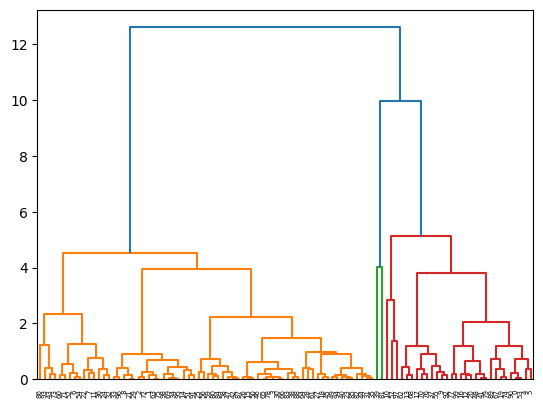

In [180]:
# First Figuring out the distance matrix using linkage
distance_matrix = linkage(df_parks_col2[['investment_dollars_per_20k_scaled','Rec_senior_centers_scaled']], method = 'ward', metric = 'euclidean')

d = dendrogram(distance_matrix)
plt.show()

*The nmost optimal number of clusters is 3*

**Now create the cluster labels based on the distance matrix**

In [181]:
df_parks_col2['label'] = fcluster(distance_matrix, 3, criterion='maxclust')

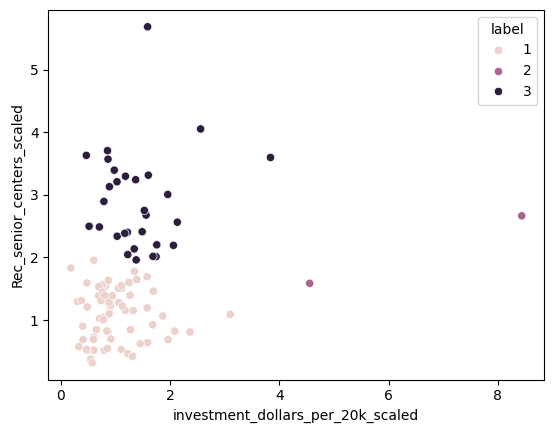

In [182]:
sns.scatterplot(x = 'investment_dollars_per_20k_scaled', y = 'Rec_senior_centers_scaled', data = df_parks_col2, hue = 'label')

plt.show()

# API and Web Scrapping

**API**

In [183]:
# API key: hM54ehaUjXV1Ywpa45zhDevnniKTnzAwC67Y8Bvj
# API website: https://api.nasa.gov/

api_key = 'hM54ehaUjXV1Ywpa45zhDevnniKTnzAwC67Y8Bvj'
quary_start_date = '2025-03-25'
quary_end_date = '2025-04-01'

# Request access to the nasa url
url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={quary_start_date}&end_date={quary_end_date}&api_key={api_key}' # API url
response = requests.get(url) # request to get access the url

**Save API request to a dictionary**

In [184]:
# Take request as json file and print it
json_data = response.json()

# I dont want to print all the data because its too big
# wihtout the outer strings, this will create the values of every key
for keys in json_data.keys():
    print("keys + ':', json_data[keys]")

keys + ':', json_data[keys]
keys + ':', json_data[keys]
keys + ':', json_data[keys]


**print the categories**

In [185]:
# Get the highest keys of the dictionary
keys = json_data.keys()
print(keys)

dict_keys(['links', 'element_count', 'near_earth_objects'])


Now I can narrow my search towards each key and get information from there

In [186]:
# I dont want to print all the data because its too big
# wihtout the outer strings, this will create the lists of dictionary inside the near_earth_objects key
for keys in json_data['near_earth_objects']:
    print("keys, ':', json_data['near_earth_objects'][keys]")

keys, ':', json_data['near_earth_objects'][keys]
keys, ':', json_data['near_earth_objects'][keys]
keys, ':', json_data['near_earth_objects'][keys]
keys, ':', json_data['near_earth_objects'][keys]
keys, ':', json_data['near_earth_objects'][keys]
keys, ':', json_data['near_earth_objects'][keys]
keys, ':', json_data['near_earth_objects'][keys]
keys, ':', json_data['near_earth_objects'][keys]


**Now I can choose where to navigate and get whatever data I want from Nasa's website**

**Web Scrapping**

In [187]:
# URL to scrap
url = 'https://calendar.whitman.edu/'

# send a request to the link
response = requests.get(url)

# Using BeautifulSoap, parser teh html of the website
soup = BeautifulSoup(response.text, 'html.parser')

**find all the links in a website**

In [188]:
# find all the tags that start with '<a'
html_links = soup.find_all('a')
html_links[:10]

[<a class="button" href="#main" id="jump-to-main">Jump the navigation</a>,
 <a aria-label="Link back to Whitman College home page." class="home-link" href="https://calendar.whitman.edu">
 <img alt="Whitman College Logo" src="https://www.whitman.edu/images/global/logos/wc-primary-white-rgb.svg"/>
 </a>,
 <a href="https://www.whitman.edu/admission-and-aid/applying-to-whitman">Apply</a>,
 <a href="https://www.whitman.edu/admission-and-aid/visit-whitman">Visit Whitman</a>,
 <a href="https://give.whitman.edu/">Make a Gift</a>,
 <a href="https://calendar.whitman.edu">Events</a>,
 <a href="/search/places" role="menuitem">Places</a>,
 <a href="/calendar" role="menuitem">Events</a>,
 <a href="/search/groups" role="menuitem">Groups</a>,
 <a href="/signup?school_id=91">
 <i class="fas fa-user fa-sm"><span class="sr-only">Sign Up</span></i>
 </a>]

*To get just the links themselves*

In [189]:
for link in html_links[:10]:
    #.get() gets whats inside the <a ... >  
    print(link.get('href'))

#main
https://calendar.whitman.edu
https://www.whitman.edu/admission-and-aid/applying-to-whitman
https://www.whitman.edu/admission-and-aid/visit-whitman
https://give.whitman.edu/
https://calendar.whitman.edu
/search/places
/calendar
/search/groups
/signup?school_id=91


**Finding all the events names in Whitman's calendar**

In [190]:
# the whole div tag contains the events information with the date and name of events

# choose the inside of the tag that is "class =" and whatever it equals to
# this will get all teh div tags that have a class equal to em-card_text

events = soup.find_all('div', {'class':'em-card_text'})

In [191]:
# to remove all the html things and get the text inside the <> ... <>

for event in events:
    # event is a single line of html inside the events list

    # .get_text() gets whats text insde the <> ... <>
    # while strip = True removes all the unecessary whitespace
    text = event.get_text(strip=True)

    # the titles happen to be a link in the body of the div tags of every event
    # the .find() works on single tag only not a list of them like events
    event_name = event.find('a').get_text()
    print(event_name)

2025 Baccalaureate Ceremony
139th Commencement Ceremony
Martial Arts 5/18/25
Final Exams - 9-11am and 2-4pm
Applications for Incompletes due to Dean of Students by 4pm.
End of Semester
Last day to pre-register for Fall 2025
Grieving@Whitman
Senior grades due 9am
Staff Recognition Breakfast
Chess Club
2025 Baccalaureate Ceremony
139th Commencement Ceremony
Grades due 9am


# 

# PCA

**Normalize the numerical dataframe**

In [192]:
# Get numerical columns only
df_parks_num = df_parks.select_dtypes(include = 'number').drop(['Population','investment_dollars'], axis = 1)

# Normalize the values into a matrix
scaler = StandardScaler()
df_parks_X = scaler.fit_transform(df_parks_num)

**Apply the PCA mehtod using SVD to reduce the columns**

In [193]:
# Save the SVD analysis in three matrices 
# full_matrices = False is to leave the 0s
U, S, VT = np.linalg.svd(df_parks_X, full_matrices = False)

# The PCs are the matric product of U and the diagonal matrix of S
PCs = U @ np.diag(S)

**To figure out the number of components to use, we need to get the explained variance**

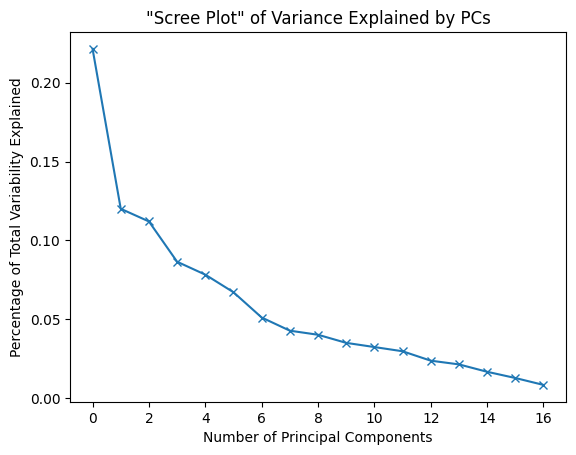

In [194]:
explained_variance = (S ** 2) / (len(df_parks_X) - 1)
explained_variance_ratio = explained_variance / explained_variance.sum()

plt.plot(explained_variance_ratio,marker='x')
plt.xlabel('Number of Principal Components')
plt.ylabel('Percentage of Total Variability Explained')
plt.title('"Scree Plot" of Variance Explained by PCs')
plt.show()

**Interpretation:**
- this shows how each PC contribute to the variability of the data
- after PC 8, the diminishing returns becomes much lower per PC
- from 7 till 8, the diminishing return is around 80-85%, which is enough

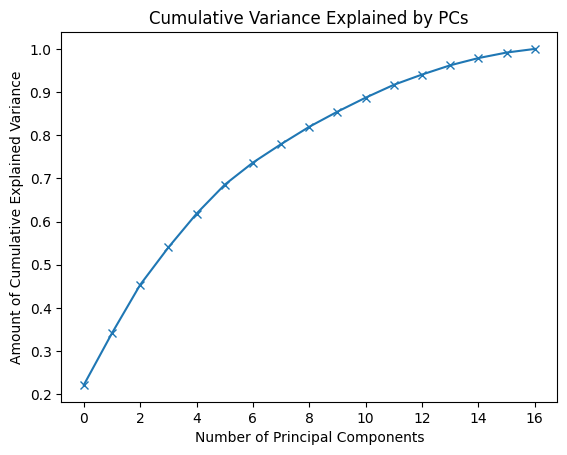

In [195]:
plt.plot(np.cumsum(explained_variance_ratio),marker='x')
plt.xlabel('Number of Principal Components')
plt.ylabel('Amount of Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by PCs')
plt.show()

**Interpretation:**
- We can identify how much the number of PC will get the variance of the data
- 8 PCs capture around 80% of the variance
- while 11 PCs capture 90%, but 80% is enough

**Now load the matrices into a dataframe with the columns as the components and the index as the columns of the original dataframe**

In [196]:
loading_matrix = pd.DataFrame(VT.T[:, :8],columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8'],index=df_parks_num.columns)
loading_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
"Acres per 1,000 people",0.008519,-0.370328,0.478222,-0.182586,0.082615,-0.309799,0.049008,-0.106057
"Parks per 10,000 residents",0.327342,-0.082016,0.138173,-0.153311,0.207078,0.125231,0.106364,-0.083493
Parks as % City Area,0.057811,-0.322536,0.533164,-0.232206,-0.054079,-0.128492,-0.085408,0.090434
Fields/ Diamonds,0.313184,-0.035182,0.002315,-0.055231,0.393961,0.029670,0.169984,0.325198
Tennis_dedicdated,0.366654,0.065049,-0.108966,-0.241781,0.089268,0.058597,-0.121992,-0.126322
Pickleball_dedicated,0.121978,-0.337325,-0.418483,-0.196922,-0.221930,-0.240258,-0.157933,-0.134184
Pickleball_combined,0.174846,-0.361863,-0.367887,-0.093655,-0.154394,-0.048057,-0.083852,0.493190
Hoops,0.372836,0.072246,0.078248,0.209384,0.188000,0.257769,-0.102705,0.034540
Community_garden_sites,0.246772,0.168708,0.196214,0.062156,-0.320369,0.070263,0.353534,0.477214
Dog_parks,0.236279,-0.189514,0.103127,0.369667,-0.291647,0.151608,-0.321424,-0.115079


*Closer to 1 more positively contributing*

*Close to -1 more negatively contributing*

*closer to 0 do no matter*

# Data Manipulation and Useful Functions

**Convert the index to columns and vice versa**

In [197]:
# Use the .T
df_parks_T = df_parks.T
df_parks_T


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
City,"Albuquerque, NM","Anaheim, CA","Anchorage, AK","Arlington, TX","Arlington, VA","Atlanta, GA","Aurora, CO","Austin, TX","Bakersfield, CA","Baltimore, MD",...,"St. Petersburg, FL","Stockton, CA","Tampa, FL","Toledo, OH","Tucson, AZ","Tulsa, OK","Virginia Beach, VA","Washington, DC","Wichita, KS","Winston-Salem, NC"
Population,553345.0,345538.0,288464.0,397158.0,245695.0,518472.0,391470.0,973671.0,411973.0,573724.0,...,261063.0,313613.0,391710.0,266422.0,542781.0,416599.0,461744.0,698878.0,381998.0,244426.0
"Acres per 1,000 people",38.905204,13.344408,3022.196184,10.869729,7.263477,10.507221,22.183054,19.748118,13.020271,8.544875,...,20.466324,3.823183,12.879937,11.759539,10.97496,19.502447,55.963911,13.294738,10.731077,15.533658
"Parks per 10,000 residents",5.692651,1.881125,7.765267,2.51789,6.023729,7.290654,2.96319,3.543291,1.747687,5.751895,...,8.00573,2.104505,4.876056,5.104684,2.450344,3.26453,0.021657,3.419767,3.036665,3.641184
Parks as % City Area,0.189322,0.143306,0.801559,0.070975,0.112112,0.063668,0.082496,0.111717,0.05601,0.095528,...,0.135575,0.030448,0.071927,0.061386,0.038913,0.065091,0.16506,0.238217,0.040266,0.044633
Fields/ Diamonds,3.560166,2.604634,3.15464,2.366816,4.436395,3.240291,1.851994,1.735699,2.33025,3.520857,...,2.94948,1.8813,2.833729,3.002755,3.555762,5.760936,2.425586,2.189223,2.82724,2.741116
Tennis_dedicdated,3.397519,1.5049,2.357313,1.208587,7.326156,6.557731,1.9414,1.76651,1.504953,2.649358,...,3.983713,4.336555,2.655025,4.504133,2.118718,5.66492,2.685471,5.008027,3.455515,7.364192
Pickleball_dedicated,1.012027,1.447019,0.693327,0.553936,0.0,0.617198,0.587529,0.308112,1.310766,0.20916,...,3.600663,0.701502,1.787036,0.300276,0.773793,0.768125,2.468901,0.429259,1.623045,0.900068
Pickleball_combined,2.891505,1.447019,0.693327,1.410018,1.628035,1.89017,0.919611,0.842174,3.155547,0.48804,...,3.600663,1.466776,1.991269,0.600551,2.155566,0.86414,2.468901,1.030223,1.623045,0.900068
Hoops,5.060134,1.5049,1.975983,7.830637,17.094365,3.896064,1.915856,2.434087,2.354523,3.904316,...,4.519982,5.356921,4.595236,2.402204,4.421673,2.928476,7.103503,6.968312,3.219912,3.436623


**If there is a qualitative data, I can use value_counts() to know how many times a name was repeated**

**Use .groupby() function to organize the data by any column while also aggregating the values by mean, sum or any customized function**

In [ ]:
# Create a column for state
df_parks['State'] = df_parks['City'].str[-2:]

# Group the whole dataframe based on state
# calculate the sum of population and invested dollars while grouping the mean of parks per 10k resident
df_parks_state_grp = df_parks.groupby('State').agg({'Population' : 'sum', 'investment_dollars': 'sum', 'Parks per 10,000 residents': 'mean'})
df_parks_state_grp.head()

,Population,investment_dollars,"Parks per 10,000 residents"
State,,,
AK,288464.0,68.927449,7.765267
AZ,3751976.0,663.709928,2.404718
CA,11896991.0,3209.728965,2.964548
CO,1611901.0,478.208356,4.155451
DC,698878.0,485.292066,3.419767
